In [1]:
import os
import torch
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quad_drift
from phase_space_reconstruction.virtual.scans import run_quad_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.train import train_1d_scan

from bmadx.plot import plot_projections
from phase_space_reconstruction.analysis import plot_scan_data, plot_predicted_screens

In [2]:
data_dir = 'data'

In [3]:
# load data:
train_dset = torch.load(os.path.join(data_dir,'train.dset'))
test_dset = torch.load(os.path.join(data_dir,'test.dset'))
print(f'train k shape: {train_dset.k.shape}')
print(f'test img shape: {train_dset.images.shape}')
print(f'train k shape: {test_dset.k.shape}')
print(f'test img shape: {test_dset.images.shape}')


# image bins: 
bins_x = torch.linspace(-0.01961639, 0.01961639, train_dset.images.shape[-2])
bins_y = torch.linspace(-0.01961639, 0.01961639, train_dset.images.shape[-1])

train k shape: torch.Size([7, 3, 1])
test img shape: torch.Size([7, 3, 200, 200])
train k shape: torch.Size([7, 3, 1])
test img shape: torch.Size([7, 3, 200, 200])


image size = 39 x 39 mm
test samples boxed in orange


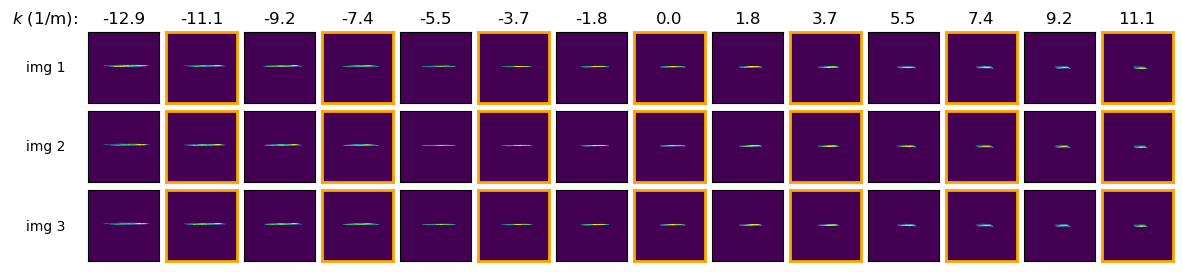

In [4]:
fig, ax = plot_scan_data(train_dset, test_dset, bins_x, bins_y)
plt.show()

In [5]:
# diagnostic beamline:
lattice = quad_drift(l_d=1.33 - (0.12/2), l_q=0.12)

# design momentum (eV)
p0c = 43e6

# diagnostic screen: 
bandwidth = (bins_x[1]-bins_x[0]) / 2
screen = ImageDiagnostic(bins_x, bins_y, bandwidth)

/home/jp/Repositories/PS-Reconstruction/phase_space_reconstruction/phase_space_reconstruction/diagnostics.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("bandwidth", torch.tensor(bandwidth))


In [6]:
# training
pred_beam = train_1d_scan(train_dset, lattice, p0c, screen, n_epochs=1000, device='cuda')

Using device: cuda


/home/jp/mambaforge/envs/ps-reconstruction/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0 tensor(4509580.5000, device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(686733.2500, device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(470233.0938, device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(414382.3750, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(437232.9688, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(403621.2500, device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(447771.6250, device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(446989.2500, device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(413123.2188, device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(400811.1250, device='cuda:0', grad_fn=<MulBackward0>)


In [7]:
# predicted screens:
ks = torch.vstack((train_dset.k, test_dset.k))
pred_dset = run_quad_scan(pred_beam, lattice, screen, ks)

image size = 39 x 39 mm
test samples boxed in orange


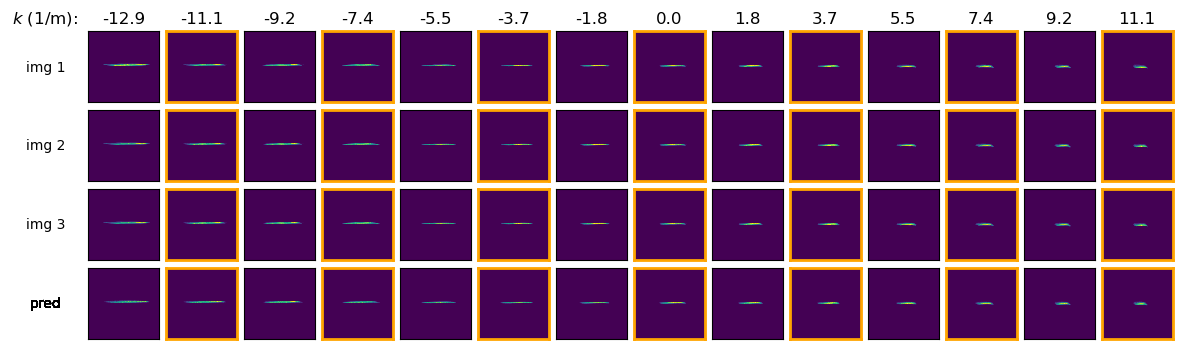

In [8]:
# compare predicted screens with data
fig, ax = plot_predicted_screens(pred_dset, train_dset, test_dset, bins_x, bins_y)
plt.show()

data
k = tensor([-3.6947]) 1/m$^2$


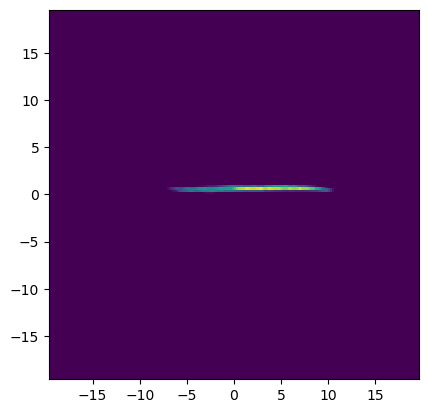

In [25]:
import numpy as np
i_k = 2
print('data')
print(f'k = {test_dset.k[i_k,0]} 1/m$^2$')
extent = np.array([bins_x[0], bins_x[-1], bins_y[0], bins_y[-1]])*1e3
plt.imshow(test_dset.images[i_k,0,:,:].T, 
            origin = 'lower',
            extent = extent,
            interpolation = 'none')

plt.show()

pred
k = tensor([-5.5421]) 1/m$^2$


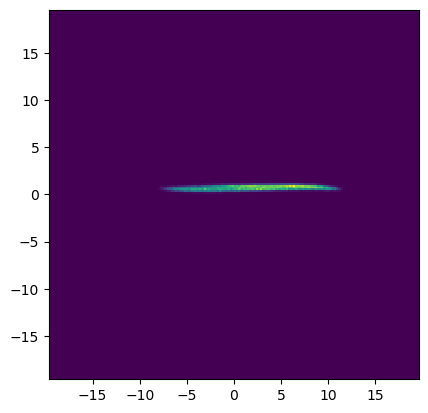

In [27]:
print('pred')
print(f'k = {pred_dset.k[i_k,0]} 1/m$^2$')
extent = np.array([bins_x[0], bins_x[-1], bins_y[0], bins_y[-1]])*1e3
plt.imshow(pred_dset.images[i_k,0,:,:].T, 
            origin = 'lower',
            extent = extent,
            interpolation = 'none')
plt.show()

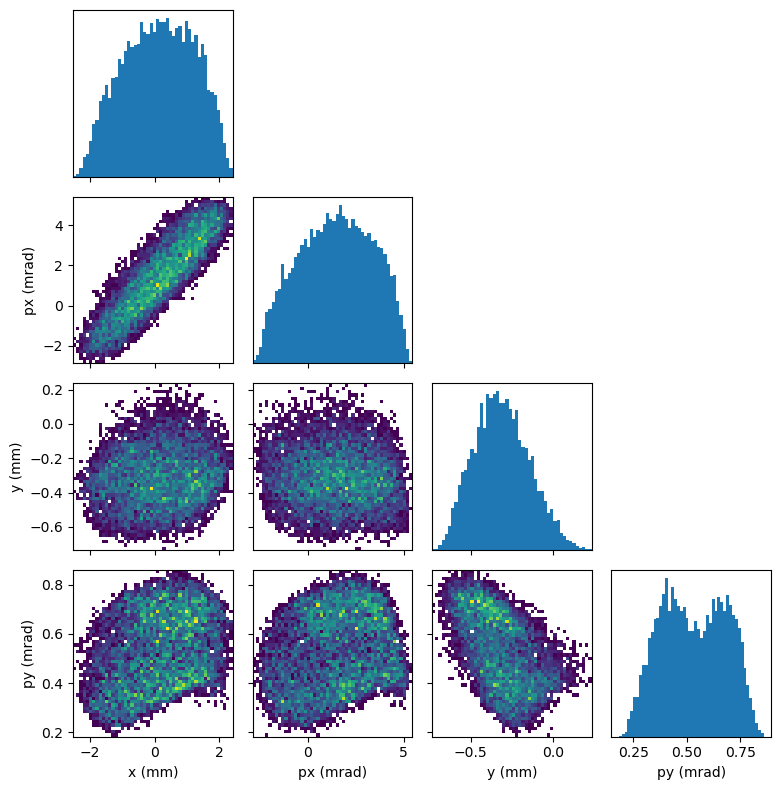

In [11]:
# reconstructed beam projections: 
fig, ax = plot_projections(pred_beam.numpy_particles(),
                           coords=['x', 'px', 'y', 'py'],
                           bins=50,
                           background=False)
plt.show()

In [12]:
pred_beam_np = pred_beam.numpy_particles()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.53349449e-03, -2.48391345e-03, -2.43433241e-03, -2.38475136e-03,
        -2.33517032e-03, -2.28558928e-03, -2.23600823e-03, -2.18642719e-03,
        -2.13684615e-03, -2.08726510e-03, -2.03768406e-03, -1.98810302e-03,
        -1.93852197e-03, -1.88894093e-03, -1.83935989e-03, -1.78977884e-03,
        -1.74019780e-03, -1.69061676e-03, -1.64103571e-03, -1.59145467e-03,
        -1.54187363e-03, -1.49229258e-03, -1.44271154e-03, -1.39313050e-03,
        -1.34354945e-03, -1.29396841e-03, -1.24438737e-03, -1.19480632e-03,
        -1.14522528e-03, -1.09564424e-03, -1.04606319e-03, -9.96482149e-04,
        -9.46901105e-04, -8.97320062e-04, -8.47739018e-04, -7.98157975e-04,
        -7.48576932e-04, -6.98995888e-04, -6.49414845e-04, -5.99833

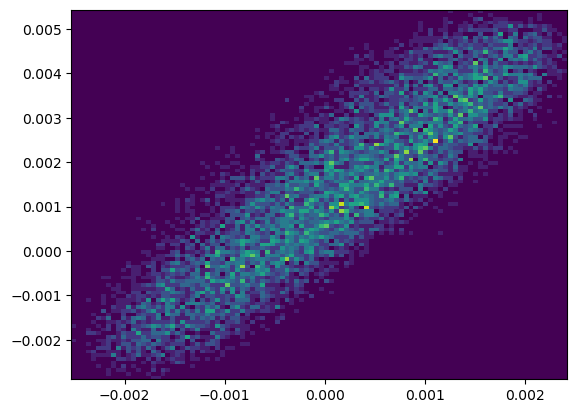

In [15]:
plt.hist2d(pred_beam_np.x, pred_beam_np.px, bins=100)

In [20]:
cov = np.cov(pred_beam_np.x, pred_beam_np.px)
det = np.linalg.det(cov)
det

9.266888037258548e-13